**Bank Customer Segmentation**

Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.



In [37]:
pip install azure-storage-blob pandas matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


*Connection with Azure Blob Storage*

In [38]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
from io import StringIO
import seaborn as sns
# Azure blob setup
connect_str = "DefaultEndpointsProtocol=https;AccountName=banktrans;AccountKey=UXGV+WN6jXwQLEn3Vws/bbx6dDYLwSWh8tEdqVjDsp2HhtfN9/SlrWGQquESfWm7iRPlJv6dV/+H+AStlKOFdA==;EndpointSuffix=core.windows.net"  # From Azure portal
container_name = "transaction-export"
blob_name = "bank_transactions.csv"

# Connect to blob
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

# Download blob content as string
download_stream = blob_client.download_blob()
csv_data = download_stream.readall().decode('utf-8')

# Read into DataFrame
df = pd.read_csv(StringIO(csv_data))


*EDA Part*

In [39]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [40]:
df['CustomerID'].value_counts().head(10)    

CustomerID
C3226689    6
C4021562    6
C5533885    6
C1113684    6
C4327447    6
C6624352    6
C1736254    6
C6222360    6
C6735477    6
C7537344    6
Name: count, dtype: int64

In [41]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [42]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


C:\Users\vicky\AppData\Local\Temp\ipykernel_16412\1651785042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_summary, x='ClusterName', y='AvgTransactionAmount', palette='Set2')


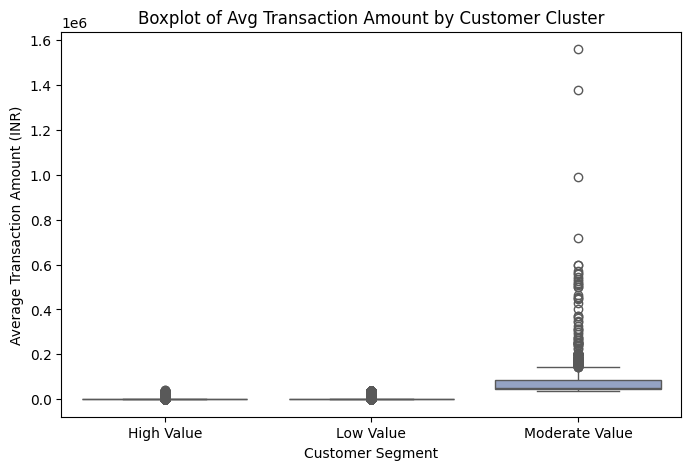

C:\Users\vicky\AppData\Local\Temp\ipykernel_16412\1651785042.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_summary, x='ClusterName', y='TransactionCount', palette='Set3')


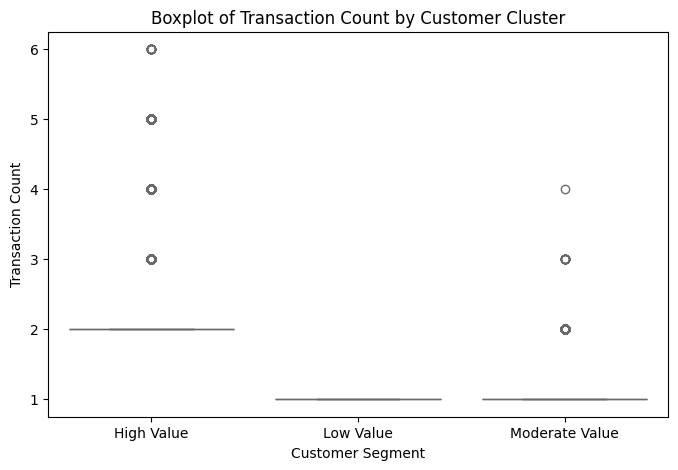

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_summary, x='ClusterName', y='AvgTransactionAmount', palette='Set2')
plt.title("Boxplot of Avg Transaction Amount by Customer Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Average Transaction Amount (INR)")
plt.show()

# Boxplot for TransactionCount
plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_summary, x='ClusterName', y='TransactionCount', palette='Set3')
plt.title("Boxplot of Transaction Count by Customer Cluster")
plt.xlabel("Customer Segment")
plt.ylabel("Transaction Count")
plt.show()

*Kmeans Classification*

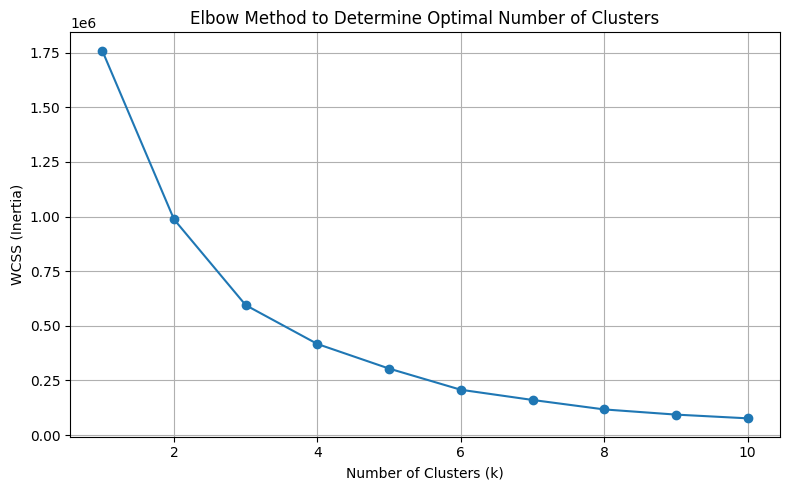

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#aggrgation here
df_trans = df[['CustomerID', 'TransactionAmount (INR)']]
customer_summary = df_trans.groupby('CustomerID').agg({
    'TransactionAmount (INR)': ['mean', 'count']
}).reset_index()
customer_summary.columns = ['CustomerID', 'AvgTransactionAmount', 'TransactionCount']

# Prepare and scale the features - AI
X = customer_summary[['AvgTransactionAmount', 'TransactionCount']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.show()



📊 Cluster Averages:
          AvgTransactionAmount  TransactionCount
Cluster                                        
0                 1270.785694          1.000000
1                 1419.220754          2.143226
2                69773.476726          1.109362


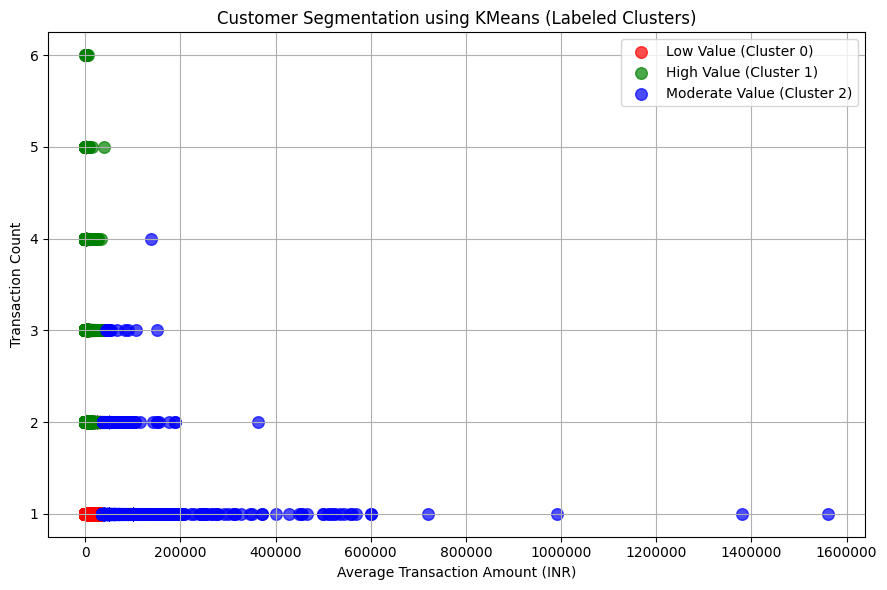

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.ticker import ScalarFormatter

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
customer_summary['Cluster'] = kmeans.fit_predict(X_scaled)


cluster_means = customer_summary.groupby('Cluster')[['AvgTransactionAmount', 'TransactionCount']].mean()
print("\n📊 Cluster Averages:\n", cluster_means)


cluster_labels = {
    0: "Low Value",     # e.g. low avg amount and low count
    1: "High Value",    # e.g. high avg amount
    2: "Moderate Value" # e.g. moderate on both
}
customer_summary['ClusterName'] = customer_summary['Cluster'].map(cluster_labels)


plt.figure(figsize=(9, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(k):
    cluster_data = customer_summary[customer_summary['Cluster'] == cluster_id]
    label_name = cluster_labels[cluster_id]
    plt.scatter(
        cluster_data['AvgTransactionAmount'],
        cluster_data['TransactionCount'],
        color=colors[cluster_id],
        label=f"{label_name} (Cluster {cluster_id})",
        s=70,
        alpha=0.7
    )

plt.title("Customer Segmentation using KMeans (Labeled Clusters)")
plt.xlabel("Average Transaction Amount (INR)")
plt.ylabel("Transaction Count")
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
